In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esense2/Dataset/test/P1/Eating_25_07_2019_04_37_40_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Staying_25_07_2019_04_42_28_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Nodding_25_07_2019_04_33_34_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Speaking_25_07_2019_04_29_44_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Walking_25_07_2019_04_47_24_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Speak and Walk_25_07_2019_04_50_57_PM.csv
/kaggle/input/esense2/Dataset/test/P1/Head Shake_25_07_2019_04_23_35_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Walking_25_07_2019_04_46_14_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Speaking_25_07_2019_04_28_34_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Nodding_25_07_2019_04_32_24_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Eating_25_07_2019_04_36_29_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Staying_25_07_2019_04_41_18_PM.csv
/kaggle/input/esense2/Dataset/train/P3/Head Shake_25_07_2019_04_22_25_PM.csv
/kaggle/input/esense2/Dataset/tr

In [55]:
dataset_path = '/kaggle/input/esense2/Dataset/train/'
person_folders = os.listdir(dataset_path)
print(person_folders)

df = pd.DataFrame()
df_list = []

for i in range(len(person_folders)):
    person_folder = person_folders[i]
    csv_file_path = dataset_path + person_folder + '/'
    csv_files = os.listdir(csv_file_path)

    for j in range(len(csv_files)):
        csv_file = csv_files[j]
        #print(csv_file)

        data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
        df_list.append(data_frame)

df = pd.concat(df_list, axis = 0, sort= True, ignore_index = True)
df.columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Label', 'Activity']

['P3', 'P5', 'P2', 'P6', 'P4']


In [56]:
df

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Label,Activity
0,1.564040e+12,-0.952393,0.288086,-0.174316,-8.841463,-7.439024,6.676829,5,Walking
1,1.564040e+12,-0.951172,0.289673,-0.173218,-8.750000,-7.439024,7.256098,5,Walking
2,1.564040e+12,-0.950317,0.290161,-0.200806,-9.420732,-7.225610,16.006098,5,Walking
3,1.564040e+12,-0.950195,0.288696,-0.196899,-9.451220,-7.103659,16.493902,5,Walking
4,1.564040e+12,-0.952148,0.289307,-0.193115,-8.506098,-7.286585,17.073171,5,Walking
...,...,...,...,...,...,...,...,...,...
92338,1.564040e+12,-0.857178,0.590454,-0.019287,12.987805,-14.634146,-28.536585,2,Speaking
92339,1.564040e+12,-0.784058,0.531372,-0.106567,115.518293,-65.457317,-26.951220,2,Speaking
92340,1.564040e+12,-0.785400,0.619263,-0.113647,74.725610,-79.390244,-61.951220,2,Speaking
92341,1.564040e+12,-0.882812,0.486450,-0.034790,29.207317,-37.439024,-9.542683,2,Speaking


In [57]:
print(df.count())
df.head()

Timestamp    92343
Ax           92343
Ay           92343
Az           92343
Gx           92343
Gy           92343
Gz           92343
Label        92343
Activity     92343
dtype: int64


,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Label,Activity
0,1.564040e+12,-0.952393,0.288086,-0.174316,-8.841463,-7.439024,6.676829,5,Walking
1,1.564040e+12,-0.951172,0.289673,-0.173218,-8.750000,-7.439024,7.256098,5,Walking
2,1.564040e+12,-0.950317,0.290161,-0.200806,-9.420732,-7.225610,16.006098,5,Walking
3,1.564040e+12,-0.950195,0.288696,-0.196899,-9.451220,-7.103659,16.493902,5,Walking
4,1.564040e+12,-0.952148,0.289307,-0.193115,-8.506098,-7.286585,17.073171,5,Walking


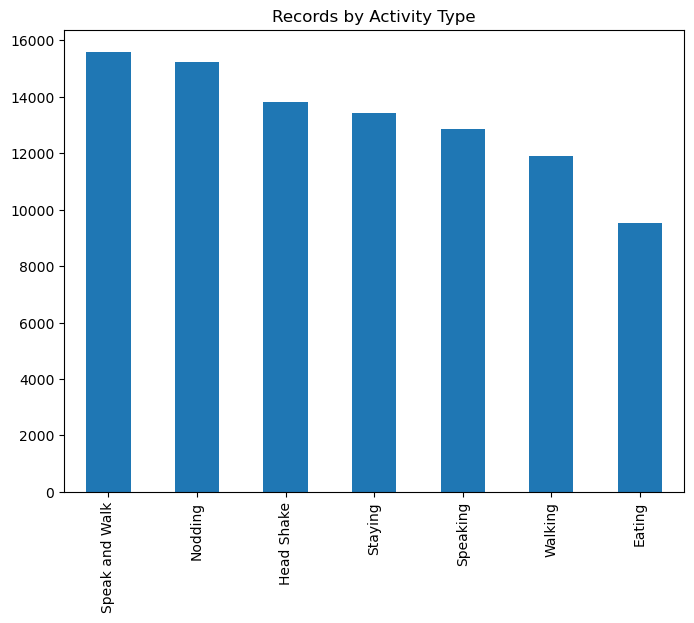

In [58]:
df['Activity'].value_counts().plot(kind='bar', title='Records by Activity Type', figsize=(8, 6),align='center');

In [59]:
y = df['Activity']

In [60]:
columns_to_drop = ['Timestamp','Label']  # replace these with your column names
df = df.drop(columns_to_drop, axis=1)

In [61]:
# Function to calculate time domain features
def calc_time_features(window):
    time_features = [window.mean(), window.median(), window.min(), 
                     window.max(), window.std(), window.var(), 
                     window.mad(), window.kurt(), window.skew()]
    return pd.Series(time_features)
# Function to calculate frequency domain features
def calc_freq_features(window):
    # Apply Fourier Transform on the window
    fourier_transform = np.abs(fft(window))

    # Frequency domain features
    freq_features = [fourier_transform.mean(), fourier_transform.std(), 
                     fourier_transform.max(), fourier_transform.min(), 
                     fourier_transform.var()]
    return pd.Series(freq_features)

def calc_freq_features(window):
    # Convert the window to a NumPy array
    window_array = window.to_numpy()
    
    # Apply Fourier Transform on the window
    fourier_transform = np.abs(fft(window_array))
    
    # Frequency domain features
    freq_features = [fourier_transform.mean(), fourier_transform.std(), 
                     fourier_transform.max(), fourier_transform.min(), 
                     fourier_transform.var()]
    
    return freq_features


In [62]:
# Set the data collection rate
data_rate = 50  # in Hz

# Set the window size and overlap in seconds
window_size_seconds = 2.56
overlap_seconds = 1.28

# Convert to number of data points
window_size = int(window_size_seconds * data_rate)
overlap = int(overlap_seconds * data_rate)

# Empty list to hold features
features = []

In [63]:
from scipy.fftpack import fft

In [ ]:
# Sliding window
for i in range(0, len(df) - window_size, overlap):
    window = df.iloc[i : i + window_size]

    # Separate the accelerometer, gyroscope, and activity data
    ax_data = window["Ax"]
    ay_data = window["Ay"]
    az_data = window["Az"]
    gx_data = window["Gx"]
    gy_data = window["Gy"]
    gz_data = window["Gz"]
    activity = window["Activity"].mode()[0]  # The most common activity in the window

    # Calculate features for each data column
    ax_time_features = calc_time_features(ax_data)
    ay_time_features = calc_time_features(ay_data)
    az_time_features = calc_time_features(az_data)
    gx_time_features = calc_time_features(gx_data)
    gy_time_features = calc_time_features(gy_data)
    gz_time_features = calc_time_features(gz_data)

    ax_freq_features = calc_freq_features(ax_data)
    ay_freq_features = calc_freq_features(ay_data)
    az_freq_features = calc_freq_features(az_data)
    gx_freq_features = calc_freq_features(gx_data)
    gy_freq_features = calc_freq_features(gy_data)
    gz_freq_features = calc_freq_features(gz_data)

    # Combine all features into a single list
    feature_vector = list(ax_time_features) + list(ay_time_features) + list(az_time_features) \
                   + list(gx_time_features) + list(gy_time_features) + list(gz_time_features) \
                   + list(ax_freq_features) + list(ay_freq_features) + list(az_freq_features) \
                   + list(gx_freq_features) + list(gy_freq_features) + list(gz_freq_features)
                    
    # Append the activity name to the feature vector
    feature_vector.append(activity)

    # Append the feature vector to the list of features
    features.append(feature_vector)

# Convert the list of features into a DataFrame
df_features = pd.DataFrame(features)


In [65]:
column_names = [
    "Ax_mean", "Ax_std", "Ax_max", "Ax_min", "Ax_median", "Ax_skew", "Ax_kurtosis", "Ax_iqr", "Ax_mad", "Ax_rms", "Ax_freq_mean", "Ax_freq_std", "Ax_freq_max", "Ax_freq_variance",
    "Ay_mean", "Ay_std", "Ay_max", "Ay_min", "Ay_median", "Ay_skew", "Ay_kurtosis", "Ay_iqr", "Ay_mad", "Ay_rms", "Ay_freq_mean", "Ay_freq_std", "Ay_freq_max", "Ay_freq_variance",
    "Az_mean", "Az_std", "Az_max", "Az_min", "Az_median", "Az_skew", "Az_kurtosis", "Az_iqr", "Az_mad", "Az_rms", "Az_freq_mean", "Az_freq_std", "Az_freq_max", "Az_freq_variance",
    "Gx_mean", "Gx_std", "Gx_max", "Gx_min", "Gx_median", "Gx_skew", "Gx_kurtosis", "Gx_iqr", "Gx_mad", "Gx_rms", "Gx_freq_mean", "Gx_freq_std", "Gx_freq_max", "Gx_freq_variance",
    "Gy_mean", "Gy_std", "Gy_max", "Gy_min", "Gy_median", "Gy_skew", "Gy_kurtosis", "Gy_iqr", "Gy_mad", "Gy_rms", "Gy_freq_mean", "Gy_freq_std", "Gy_freq_max", "Gy_freq_variance",
    "Gz_mean", "Gz_std", "Gz_max", "Gz_min", "Gz_median", "Gz_skew", "Gz_kurtosis", "Gz_iqr", "Gz_mad", "Gz_rms", "Gz_freq_mean", "Gz_freq_std", "Gz_freq_max", "Gz_freq_variance",
    "activity"
]

df_features.columns = column_names

df_features.columns = column_names

# Save the features to a new CSV file
#X_sm_features.to_csv("E-Sense_features21.csv", index=False)    

In [66]:
df_features

,Ax_mean,Ax_std,Ax_max,Ax_min,Ax_median,Ax_skew,Ax_kurtosis,Ax_iqr,Ax_mad,Ax_rms,...,Gz_skew,Gz_kurtosis,Gz_iqr,Gz_mad,Gz_rms,Gz_freq_mean,Gz_freq_std,Gz_freq_max,Gz_freq_variance,activity
0,-0.931063,-0.937805,-1.164551,-0.799316,0.051765,0.002680,0.035853,4.387874,-1.295735,0.293164,...,227.067118,1272.256098,18.755054,51559.476062,157.251457,141.715257,969.664634,16.355508,20083.214197,Walking
1,-0.930424,-0.923462,-1.164551,-0.799316,0.055264,0.003054,0.039671,3.076840,-1.136574,0.277579,...,257.687857,1584.768660,28.189108,66403.031501,182.367007,167.851586,1001.615311,14.932099,28174.154987,Walking
2,-0.942737,-0.936035,-1.191406,-0.837036,0.057654,0.003324,0.040150,3.766319,-1.551748,0.225821,...,163.064303,1084.253622,7.715662,26589.966865,174.189181,148.016638,730.811710,27.551850,21908.925037,Walking
3,-0.948337,-0.938232,-1.191406,-0.829712,0.065269,0.004260,0.047267,2.071723,-1.209301,0.204573,...,162.755329,744.243944,24.720926,26489.297251,187.862940,151.757044,690.410726,12.482877,23030.200519,Walking
4,-0.946963,-0.940491,-1.260376,-0.775024,0.066823,0.004465,0.046616,3.907219,-1.196696,0.172898,...,191.290094,899.261937,14.115854,36591.900206,213.538403,181.575799,883.232166,30.780376,32969.770670,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,-0.807802,-0.838379,-0.940552,-0.481445,0.107175,0.011487,0.071828,2.662084,1.862852,0.524530,...,323.176545,1304.485993,20.768226,104443.079477,297.905910,289.817905,1065.167953,18.072310,83994.418193,Speaking
1437,-0.842330,-0.842468,-0.940552,-0.766235,0.034907,0.001219,0.027419,0.001642,-0.390260,0.498295,...,118.677563,664.839397,19.137544,14084.363891,128.872477,92.140492,379.784662,16.469385,8489.870320,Speaking
1438,-0.857783,-0.850525,-0.960571,-0.774536,0.041452,0.001718,0.034594,-1.001846,-0.274152,0.459985,...,158.602518,769.321596,30.587750,25154.758827,159.224686,83.411334,381.003261,10.499004,6957.450599,Speaking
1439,-0.877813,-0.877441,-0.960571,-0.796997,0.036826,0.001356,0.030335,-0.490741,0.576716,0.427116,...,151.078172,731.698064,38.164809,22824.614079,172.707161,87.593729,418.624317,35.676262,7672.661411,Speaking


In [67]:
y_train=df_features['activity']

In [68]:
X_train = df_features.drop('activity', axis=1)

In [69]:
dataset_path = '/kaggle/input/esense2/Dataset/test/'
person_folders = os.listdir(dataset_path)
print(person_folders)

df_t = pd.DataFrame()
df_t_list = []

for i in range(len(person_folders)):
    person_folder = person_folders[i]
    csv_file_path = dataset_path + person_folder + '/'
    csv_files = os.listdir(csv_file_path)

    for j in range(len(csv_files)):
        csv_file = csv_files[j]
        #print(csv_file)

        data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
        df_t_list.append(data_frame)

df_t = pd.concat(df_t_list, axis = 0, sort= True, ignore_index = True)
df_t.columns = ['Timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Label', 'Activity']

['P1']


In [70]:
df.shape

(92343, 7)

In [71]:
df_t.shape

(13538, 9)

In [72]:
print(df_t.count())
df_t.head()

Timestamp    13538
Ax           13538
Ay           13538
Az           13538
Gx           13538
Gy           13538
Gz           13538
Label        13538
Activity     13538
dtype: int64


,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Label,Activity
0,1.564040e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,Eating
1,1.564040e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,Eating
2,1.564040e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,Eating
3,1.564040e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,Eating
4,1.564040e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,Eating


In [73]:
y_t = df_t['Activity']

In [74]:
columns_to_drop = ['Timestamp','Label']  # replace these with your column names
df_t = df_t.drop(columns_to_drop, axis=1)

In [75]:
# Set the data collection rate
data_rate = 50  # in Hz

# Set the window size and overlap in seconds
window_size_seconds = 2.56
overlap_seconds = 1.28

# Convert to number of data points
window_size = int(window_size_seconds * data_rate)
overlap = int(overlap_seconds * data_rate)

# Empty list to hold features
features = []

In [ ]:
# Sliding window
for i in range(0, len(df_t) - window_size, overlap):
    window = df_t.iloc[i : i + window_size]

    # Separate the accelerometer, gyroscope, and activity data
    ax_data = window["Ax"]
    ay_data = window["Ay"]
    az_data = window["Az"]
    gx_data = window["Gx"]
    gy_data = window["Gy"]
    gz_data = window["Gz"]
    activity = window["Activity"].mode()[0]  # The most common activity in the window

    # Calculate features for each data column
    ax_time_features = calc_time_features(ax_data)
    ay_time_features = calc_time_features(ay_data)
    az_time_features = calc_time_features(az_data)
    gx_time_features = calc_time_features(gx_data)
    gy_time_features = calc_time_features(gy_data)
    gz_time_features = calc_time_features(gz_data)

    ax_freq_features = calc_freq_features(ax_data)
    ay_freq_features = calc_freq_features(ay_data)
    az_freq_features = calc_freq_features(az_data)
    gx_freq_features = calc_freq_features(gx_data)
    gy_freq_features = calc_freq_features(gy_data)
    gz_freq_features = calc_freq_features(gz_data)

    # Combine all features into a single list
    feature_vector = list(ax_time_features) + list(ay_time_features) + list(az_time_features) \
                   + list(gx_time_features) + list(gy_time_features) + list(gz_time_features) \
                   + list(ax_freq_features) + list(ay_freq_features) + list(az_freq_features) \
                   + list(gx_freq_features) + list(gy_freq_features) + list(gz_freq_features)
                    
    # Append the activity name to the feature vector
    feature_vector.append(activity)

    # Append the feature vector to the list of features
    features.append(feature_vector)

# Convert the list of features into a DataFrame
df_t_features = pd.DataFrame(features)


In [77]:
column_names = [
    "Ax_mean", "Ax_std", "Ax_max", "Ax_min", "Ax_median", "Ax_skew", "Ax_kurtosis", "Ax_iqr", "Ax_mad", "Ax_rms", "Ax_freq_mean", "Ax_freq_std", "Ax_freq_max", "Ax_freq_variance",
    "Ay_mean", "Ay_std", "Ay_max", "Ay_min", "Ay_median", "Ay_skew", "Ay_kurtosis", "Ay_iqr", "Ay_mad", "Ay_rms", "Ay_freq_mean", "Ay_freq_std", "Ay_freq_max", "Ay_freq_variance",
    "Az_mean", "Az_std", "Az_max", "Az_min", "Az_median", "Az_skew", "Az_kurtosis", "Az_iqr", "Az_mad", "Az_rms", "Az_freq_mean", "Az_freq_std", "Az_freq_max", "Az_freq_variance",
    "Gx_mean", "Gx_std", "Gx_max", "Gx_min", "Gx_median", "Gx_skew", "Gx_kurtosis", "Gx_iqr", "Gx_mad", "Gx_rms", "Gx_freq_mean", "Gx_freq_std", "Gx_freq_max", "Gx_freq_variance",
    "Gy_mean", "Gy_std", "Gy_max", "Gy_min", "Gy_median", "Gy_skew", "Gy_kurtosis", "Gy_iqr", "Gy_mad", "Gy_rms", "Gy_freq_mean", "Gy_freq_std", "Gy_freq_max", "Gy_freq_variance",
    "Gz_mean", "Gz_std", "Gz_max", "Gz_min", "Gz_median", "Gz_skew", "Gz_kurtosis", "Gz_iqr", "Gz_mad", "Gz_rms", "Gz_freq_mean", "Gz_freq_std", "Gz_freq_max", "Gz_freq_variance",
    "activity"
]

df_t_features.columns = column_names

df_t_features.columns = column_names

# Save the features to a new CSV file
#X_sm_features.to_csv("E-Sense_features21.csv", index=False)    

In [78]:
y_test=df_t_features['activity']

In [79]:
X_train

,Ax_mean,Ax_std,Ax_max,Ax_min,Ax_median,Ax_skew,Ax_kurtosis,Ax_iqr,Ax_mad,Ax_rms,...,Gz_median,Gz_skew,Gz_kurtosis,Gz_iqr,Gz_mad,Gz_rms,Gz_freq_mean,Gz_freq_std,Gz_freq_max,Gz_freq_variance
0,-0.931063,-0.937805,-1.164551,-0.799316,0.051765,0.002680,0.035853,4.387874,-1.295735,0.293164,...,196.198463,227.067118,1272.256098,18.755054,51559.476062,157.251457,141.715257,969.664634,16.355508,20083.214197
1,-0.930424,-0.923462,-1.164551,-0.799316,0.055264,0.003054,0.039671,3.076840,-1.136574,0.277579,...,224.278042,257.687857,1584.768660,28.189108,66403.031501,182.367007,167.851586,1001.615311,14.932099,28174.154987
2,-0.942737,-0.936035,-1.191406,-0.837036,0.057654,0.003324,0.040150,3.766319,-1.551748,0.225821,...,191.735410,163.064303,1084.253622,7.715662,26589.966865,174.189181,148.016638,730.811710,27.551850,21908.925037
3,-0.948337,-0.938232,-1.191406,-0.829712,0.065269,0.004260,0.047267,2.071723,-1.209301,0.204573,...,205.648928,162.755329,744.243944,24.720926,26489.297251,187.862940,151.757044,690.410726,12.482877,23030.200519
4,-0.946963,-0.940491,-1.260376,-0.775024,0.066823,0.004465,0.046616,3.907219,-1.196696,0.172898,...,234.950523,191.290094,899.261937,14.115854,36591.900206,213.538403,181.575799,883.232166,30.780376,32969.770670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,-0.807802,-0.838379,-0.940552,-0.481445,0.107175,0.011487,0.071828,2.662084,1.862852,0.524530,...,351.873583,323.176545,1304.485993,20.768226,104443.079477,297.905910,289.817905,1065.167953,18.072310,83994.418193
1437,-0.842330,-0.842468,-0.940552,-0.766235,0.034907,0.001219,0.027419,0.001642,-0.390260,0.498295,...,150.159487,118.677563,664.839397,19.137544,14084.363891,128.872477,92.140492,379.784662,16.469385,8489.870320
1438,-0.857783,-0.850525,-0.960571,-0.774536,0.041452,0.001718,0.034594,-1.001846,-0.274152,0.459985,...,225.398222,158.602518,769.321596,30.587750,25154.758827,159.224686,83.411334,381.003261,10.499004,6957.450599
1439,-0.877813,-0.877441,-0.960571,-0.796997,0.036826,0.001356,0.030335,-0.490741,0.576716,0.427116,...,224.311780,151.078172,731.698064,38.164809,22824.614079,172.707161,87.593729,418.624317,35.676262,7672.661411


In [80]:
X_test = df_t_features.drop('activity', axis=1)

In [81]:
X_test

,Ax_mean,Ax_std,Ax_max,Ax_min,Ax_median,Ax_skew,Ax_kurtosis,Ax_iqr,Ax_mad,Ax_rms,...,Gz_median,Gz_skew,Gz_kurtosis,Gz_iqr,Gz_mad,Gz_rms,Gz_freq_mean,Gz_freq_std,Gz_freq_max,Gz_freq_variance
0,0.557727,0.573853,0.244263,0.639648,0.071741,0.005147,0.044877,6.644232,-2.485692,0.773565,...,103.045417,126.439711,700.274341,0.872470,15987.000598,164.322967,277.930645,1700.487805,12.188839,77245.443693
1,0.593196,0.598022,0.556030,0.608521,0.014934,0.000223,0.010531,1.383278,-1.726536,0.753986,...,36.847272,25.031731,126.371951,2.042683,626.587552,28.239947,20.948127,198.384146,4.348971,438.824013
2,0.600481,0.602234,0.578247,0.609009,0.007690,0.000059,0.005162,3.180542,-1.941731,0.746372,...,34.448895,20.631287,105.335366,1.251319,425.649986,25.437448,23.628893,225.579268,1.770691,558.324590
3,0.594826,0.601990,0.578125,0.609253,0.012675,0.000161,0.012302,-1.857178,-0.244693,0.741296,...,35.603991,23.288166,142.500000,6.777365,542.338694,25.238746,22.512329,232.591463,3.492258,506.804978
4,0.598851,0.591614,0.578125,0.629395,0.018384,0.000338,0.016514,-1.287125,0.539857,0.749681,...,35.690997,25.659091,151.859756,2.758471,658.388949,26.136238,23.770216,246.097561,2.407003,565.023171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.369179,0.395813,0.265625,0.446655,0.062579,0.003916,0.056168,-1.380091,-0.438959,0.817533,...,61.327073,77.477773,500.995606,1.959858,6002.805365,66.436111,115.564739,674.670864,2.134146,13355.208831
206,0.382796,0.394897,0.265625,0.483154,0.081047,0.006569,0.075535,-1.687907,-0.140491,0.806748,...,60.760098,89.309570,437.835366,3.745367,7976.199230,75.108234,154.321095,1096.900258,3.206156,23815.000471
207,0.365539,0.428711,0.153320,0.483154,0.120253,0.014461,0.108828,-1.317462,-0.631315,0.792099,...,67.185487,94.203276,571.097561,5.975610,8874.257291,99.967986,220.603483,1467.537897,8.566469,48665.896656
208,0.332561,0.345215,0.153320,0.514771,0.120912,0.014620,0.111578,-1.612923,-0.046993,0.829979,...,60.524242,68.031952,361.095863,3.752200,4628.346432,98.900843,252.943755,1932.922572,4.587169,63980.543293


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
scaler.fit(X_test)
X_test_data_lr = scaler.transform(X_test)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

def grid_search_cv(X, y):
    # Random Forest
    rf_param_grid = {'n_estimators': [100, 200, 300],
                     'max_depth': [None, 5, 10]}
    rf_model = RandomForestClassifier()
    rf_grid_search = GridSearchCV(rf_model, rf_param_grid)
    rf_grid_search.fit(X, y)

    # Logistic Regression
    lr_param_grid = {'C': [0.1, 1, 10],
                     'penalty': ['l1', 'l2']}
    lr_model = LogisticRegression()
    lr_grid_search = GridSearchCV(lr_model, lr_param_grid)
    lr_grid_search.fit(X, y)

    # MLP
    mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                      'activation': ['relu', 'tanh'],
                      'alpha': [0.0001, 0.001]}
    mlp_model = MLPClassifier()
    mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid)
    mlp_grid_search.fit(X, y)

    # SVM
    svm_param_grid = {'C': [1, 10, 100],
                      'kernel': ['linear', 'rbf']}
    svm_model = SVC()
    svm_grid_search = GridSearchCV(svm_model, svm_param_grid)
    svm_grid_search.fit(X, y)

    # Return the best models and parameters
    best_rf_model = rf_grid_search.best_estimator_
    best_lr_model = lr_grid_search.best_estimator_
    best_mlp_model = mlp_grid_search.best_estimator_
    best_svm_model = svm_grid_search.best_estimator_

    return best_rf_model, best_lr_model, best_mlp_model, best_svm_model


In [ ]:

# Perform grid search CV
best_rf_model, best_lr_model, best_mlp_model, best_svm_model = grid_search_cv(X_train_data_lr, y_train)

In [86]:

# Train the models with the best parameters on the entire training dataset
best_rf_model.fit(X_train_data_lr, y_train)
best_lr_model.fit(X_train_data_lr, y_train)
best_mlp_model.fit(X_train_data_lr, y_train)
best_svm_model.fit(X_train_data_lr, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC(C=100)

In [87]:
y_test.shape

(210,)

In [88]:
# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_data_lr)

# Evaluate the accuracy of the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

Random Forest Accuracy: 0.7238095238095238


In [89]:
# Predict the response for the test dataset
y_pred = best_svm_model.predict(X_test_data_lr)
accuracy_rf = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', accuracy_rf)

SVM Accuracy: 0.46190476190476193


In [90]:
y_pred_mlp = best_mlp_model.predict(X_test_data_lr)

# Evaluate the accuracy of the classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print('MLP Accuracy:', accuracy_mlp)

MLP Accuracy: 0.4666666666666667


In [91]:
# Predict the response for the test dataset
y_pred_lr = best_lr_model.predict(X_test_data_lr)
accuracy_mlp = accuracy_score(y_test, y_pred_lr)
print('lr Accuracy:', accuracy_mlp)

lr Accuracy: 0.6904761904761905
